In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import pandas as pd
import pickle
import shutil
import os

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [2]:
##  DEFINE FOLDER THAT HAS IMAGES  ##

# subset the metadata to just the files in a specific folder
folder_path = "/Users/brianmiller/Desktop/trading_card_data/verified_data/cropped_data/"

In [3]:
##  GET SIZE METADATA ABOUT THE IMAGES  ##

# Initialize an empty list to store the metadata
metadata_list = []

# Iterate through all files in the directory
for file in os.listdir(folder_path):
    # Check if the file is a .jpg
    if file.endswith(".jpg"):
        # Extract the grade
        grade = int(file.split("PSA")[1].split("_")[0])

        # Build the original file name
        original_file_name = file.split("_cropped")[0] + ".jpg"

        # Get the file path
        file_path = os.path.join(folder_path, file)

        # Get image dimensions
        with Image.open(file_path) as img:
            width, height = img.size

        # Append the metadata as a tuple to the list
        metadata_list.append((file, file_path, grade, original_file_name, width, height))

# Convert the list of tuples to a DataFrame
metadata_df = pd.DataFrame(metadata_list, columns=["file_name", "file_path", "grade", "original_file_name", "image_x_dimensions", "image_y_dimensions"])

print(metadata_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   file_name           5824 non-null   object
 1   file_path           5824 non-null   object
 2   grade               5824 non-null   int64 
 3   original_file_name  5824 non-null   object
 4   image_x_dimensions  5824 non-null   int64 
 5   image_y_dimensions  5824 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 273.1+ KB
None


grade
5        721
9        702
7        694
3        650
2        630
6        552
8        524
4        518
1        442
10       391
dtype: int64


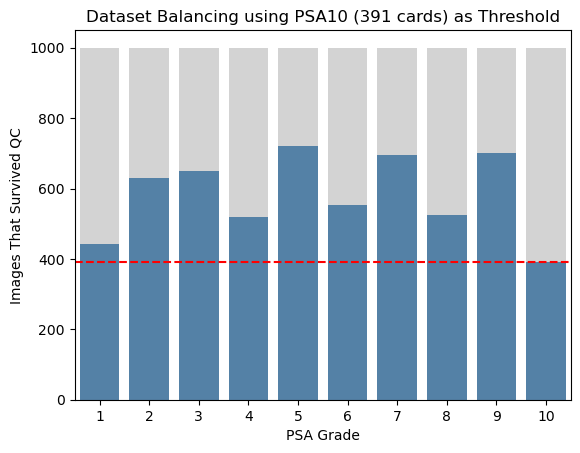

In [4]:
##  VISUALIZE DATASET BALANCING  ##

# find the number of cards that the was the least, by grade
# this will be used as the new number of cards for every grade
min_card_freq = metadata_df[["grade"]].value_counts().min()

# display the number of cards per grade
print(metadata_df[["grade"]].value_counts())

import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for the background bar
background_data = pd.DataFrame({'grade': metadata_df['grade'], 'count': 1000})

# Plot the background bar
sns.barplot(x='grade', y='count', data=background_data, color='lightgray')

# Plot the count of images that survived QC
sns.countplot(x='grade', data=metadata_df, color='steelblue', order=sorted(metadata_df['grade'].unique(), reverse=False))

# Set the plot title and axis labels
plt.title('Dataset Balancing using PSA10 ({} cards) as Threshold'.format(min_card_freq))
plt.xlabel('PSA Grade')
plt.ylabel('Images That Survived QC')

# Add a horizontal line at the specific value
plt.axhline(y=min_card_freq, color='red', linestyle='--')

# Display the plot
plt.show()



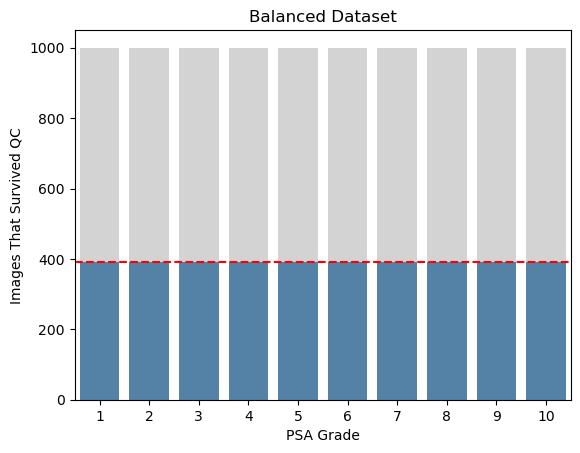

In [5]:
##  SAMPLING THE DATASET TO STANDARDIZE THE OUTCOME SIZES  ##

# Group the metadata_df by grade and sample 391 rows from each grade
metadata_df_subset = metadata_df.groupby('grade').sample(n=min_card_freq, random_state=42)

# Reset the index of the new DataFrame
metadata_df_subset = metadata_df_subset.reset_index(drop=True)

# Plot the background bar
sns.barplot(x='grade', y='count', data=background_data, color='lightgray')

# viz the card distribution, with the min grade cutoff
sns.countplot(x='grade', data=metadata_df_subset,color='steelblue', order=sorted(metadata_df_subset['grade'].unique(), reverse=False))

# Set the plot title and axis labels
plt.title('Balanced Dataset'.format(min_card_freq))
plt.xlabel('PSA Grade')
plt.ylabel('Images That Survived QC')

# Add a horizontal line at the specific value
plt.axhline(y=min_card_freq, color='red', linestyle='--')



# Display the plot
plt.show()


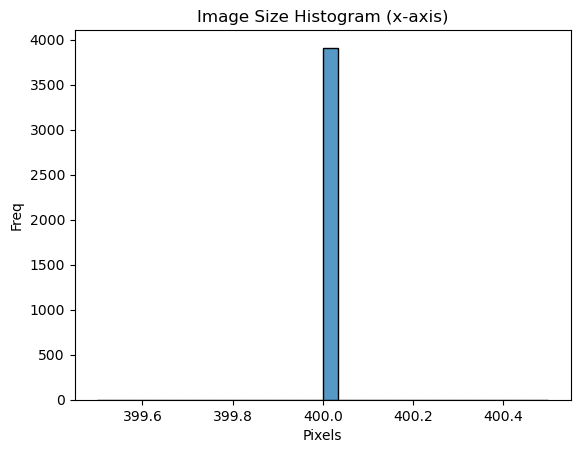

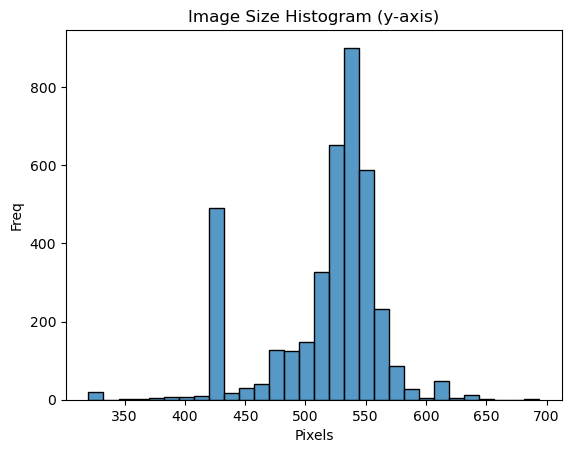

In [6]:
## IMAGE DIMENSIONS DISTRIBUTIONS
sns.histplot(metadata_df_subset['image_x_dimensions'], kde=False, bins=30)
plt.title('Image Size Histogram (x-axis)')
plt.xlabel('Pixels')
plt.ylabel('Freq')
plt.show()

sns.histplot(metadata_df_subset['image_y_dimensions'], kde=False, bins=30)
plt.title('Image Size Histogram (y-axis)')
plt.xlabel('Pixels')
plt.ylabel('Freq')
plt.show()

In [8]:
### RUN ONLY ONCE ###
##  MOVING SUBSET OF FILES TO NEW DIR  ##

# # Specify the destination directory
# destination_directory = "/Users/brianmiller/Desktop/trading_card_data/verified_data/cropped_data/data_for_model_1"

# # Iterate over the file paths in metadata_df_subset
# for file_path in metadata_df_subset['file_path']:
#     try:
#         # Extract the file name from the file path
#         file_name = os.path.basename(file_path)

#         # Construct the destination file path
#         destination_file_path = os.path.join(destination_directory, file_name)

#         # Move the file to the destination directory
#         shutil.move(file_path, destination_file_path)
    
#     except FileNotFoundError:
#         print(f"File not found at location: {file_path}")

#     except shutil.Error as e:
#         print(f"Error moving file: {file_path}\n{str(e)}")


File not found at location: /Users/brianmiller/Desktop/trading_card_data/verified_data/cropped_data/card548_PSA1_cropped.jpg


In [10]:
# Write the DataFrame to a pickle file
metadata_df_subset.to_pickle("/Users/brianmiller/Desktop/trading_card_data/verified_data/cropped_data/data_for_model_1/metadata_df_subset.pkl")